<a href="https://colab.research.google.com/github/josejailson/HumanResource/blob/main/Human_Resources_Department.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction: understanding the problem

We know that hiring and retainig employees are extremely complex tasks that require much capital and time.
For a idea, companies spend 15%-20% of the employees' salaries to recruit new candidaties, and small business owners spend 40% of their working hours on tasks that do not generate any income such as hiring (https://toggl.com/blog/cost-of-hiring-an-employee).

This problem results in revenue loss between 1% and 2.5%. Besides, hiring a new employee costs $7645, on average, and it takes 52 days to fill a position.

Here, we pretend to create a model to predict wich employees are more likely to quit.
Our dataset contains information such job involvement, education, job satisfaction, performance, work-life balance and relationship satisfaction (https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).

# EDA

## Step 1: getting the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv("Human_Resources.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [42]:
df.columns = df.columns.str.lower() # just renaming column names

In [43]:
df.describe()

,age,dailyrate,distancefromhome,education,employeecount,employeenumber,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [44]:
df.select_dtypes(object).info() # to see only the categorical attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   attrition       1470 non-null   object
 1   businesstravel  1470 non-null   object
 2   department      1470 non-null   object
 3   educationfield  1470 non-null   object
 4   gender          1470 non-null   object
 5   jobrole         1470 non-null   object
 6   maritalstatus   1470 non-null   object
 7   over18          1470 non-null   object
 8   overtime        1470 non-null   object
dtypes: object(9)
memory usage: 103.5+ KB


In [45]:
df.head(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df.tail(5)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


## Step 2: exploring and visualizing the data

Let's replace 'attritition' , 'overtime' and 'over18' columns with integers before performing any visualizations.

In [47]:
df["attrition"] = df["attrition"].apply(lambda x: 1 if x=="Yes" else 0)
df["overtime"] = df["overtime"].apply(lambda x: 1 if x=="Yes" else 0)
df["over18"] = df["over18"].apply(lambda x: 1 if x=="Y" else 0)

In [48]:
df.head(4)

,age,attrition,businesstravel,dailyrate,department,distancefromhome,education,educationfield,employeecount,employeenumber,...,relationshipsatisfaction,standardhours,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0


Now, let's see if we have any missing data.

<Axes: >

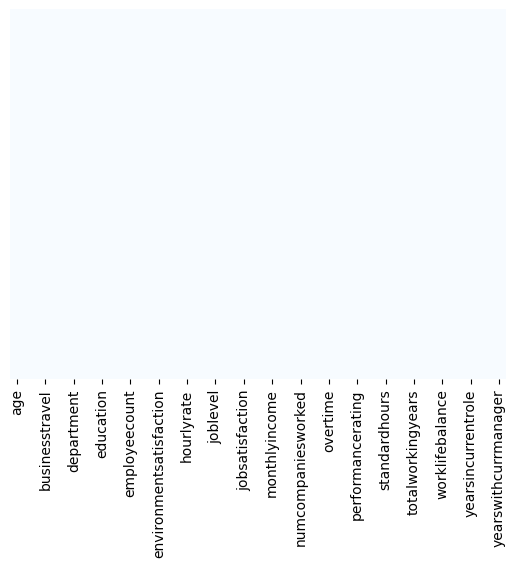

In [49]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="Blues")

Luckly we don't!

Our first visualization job will be plot some histograms in order to check columns data distributions.

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'attrition'}>,
        <Axes: title={'center': 'dailyrate'}>,
        <Axes: title={'center': 'distancefromhome'}>,
        <Axes: title={'center': 'education'}>],
       [<Axes: title={'center': 'employeecount'}>,
        <Axes: title={'center': 'employeenumber'}>,
        <Axes: title={'center': 'environmentsatisfaction'}>,
        <Axes: title={'center': 'hourlyrate'}>,
        <Axes: title={'center': 'jobinvolvement'}>],
       [<Axes: title={'center': 'joblevel'}>,
        <Axes: title={'center': 'jobsatisfaction'}>,
        <Axes: title={'center': 'monthlyincome'}>,
        <Axes: title={'center': 'monthlyrate'}>,
        <Axes: title={'center': 'numcompaniesworked'}>],
       [<Axes: title={'center': 'over18'}>,
        <Axes: title={'center': 'overtime'}>,
        <Axes: title={'center': 'percentsalaryhike'}>,
        <Axes: title={'center': 'performancerating'}>,
        <Axes: title={'center': 'relations

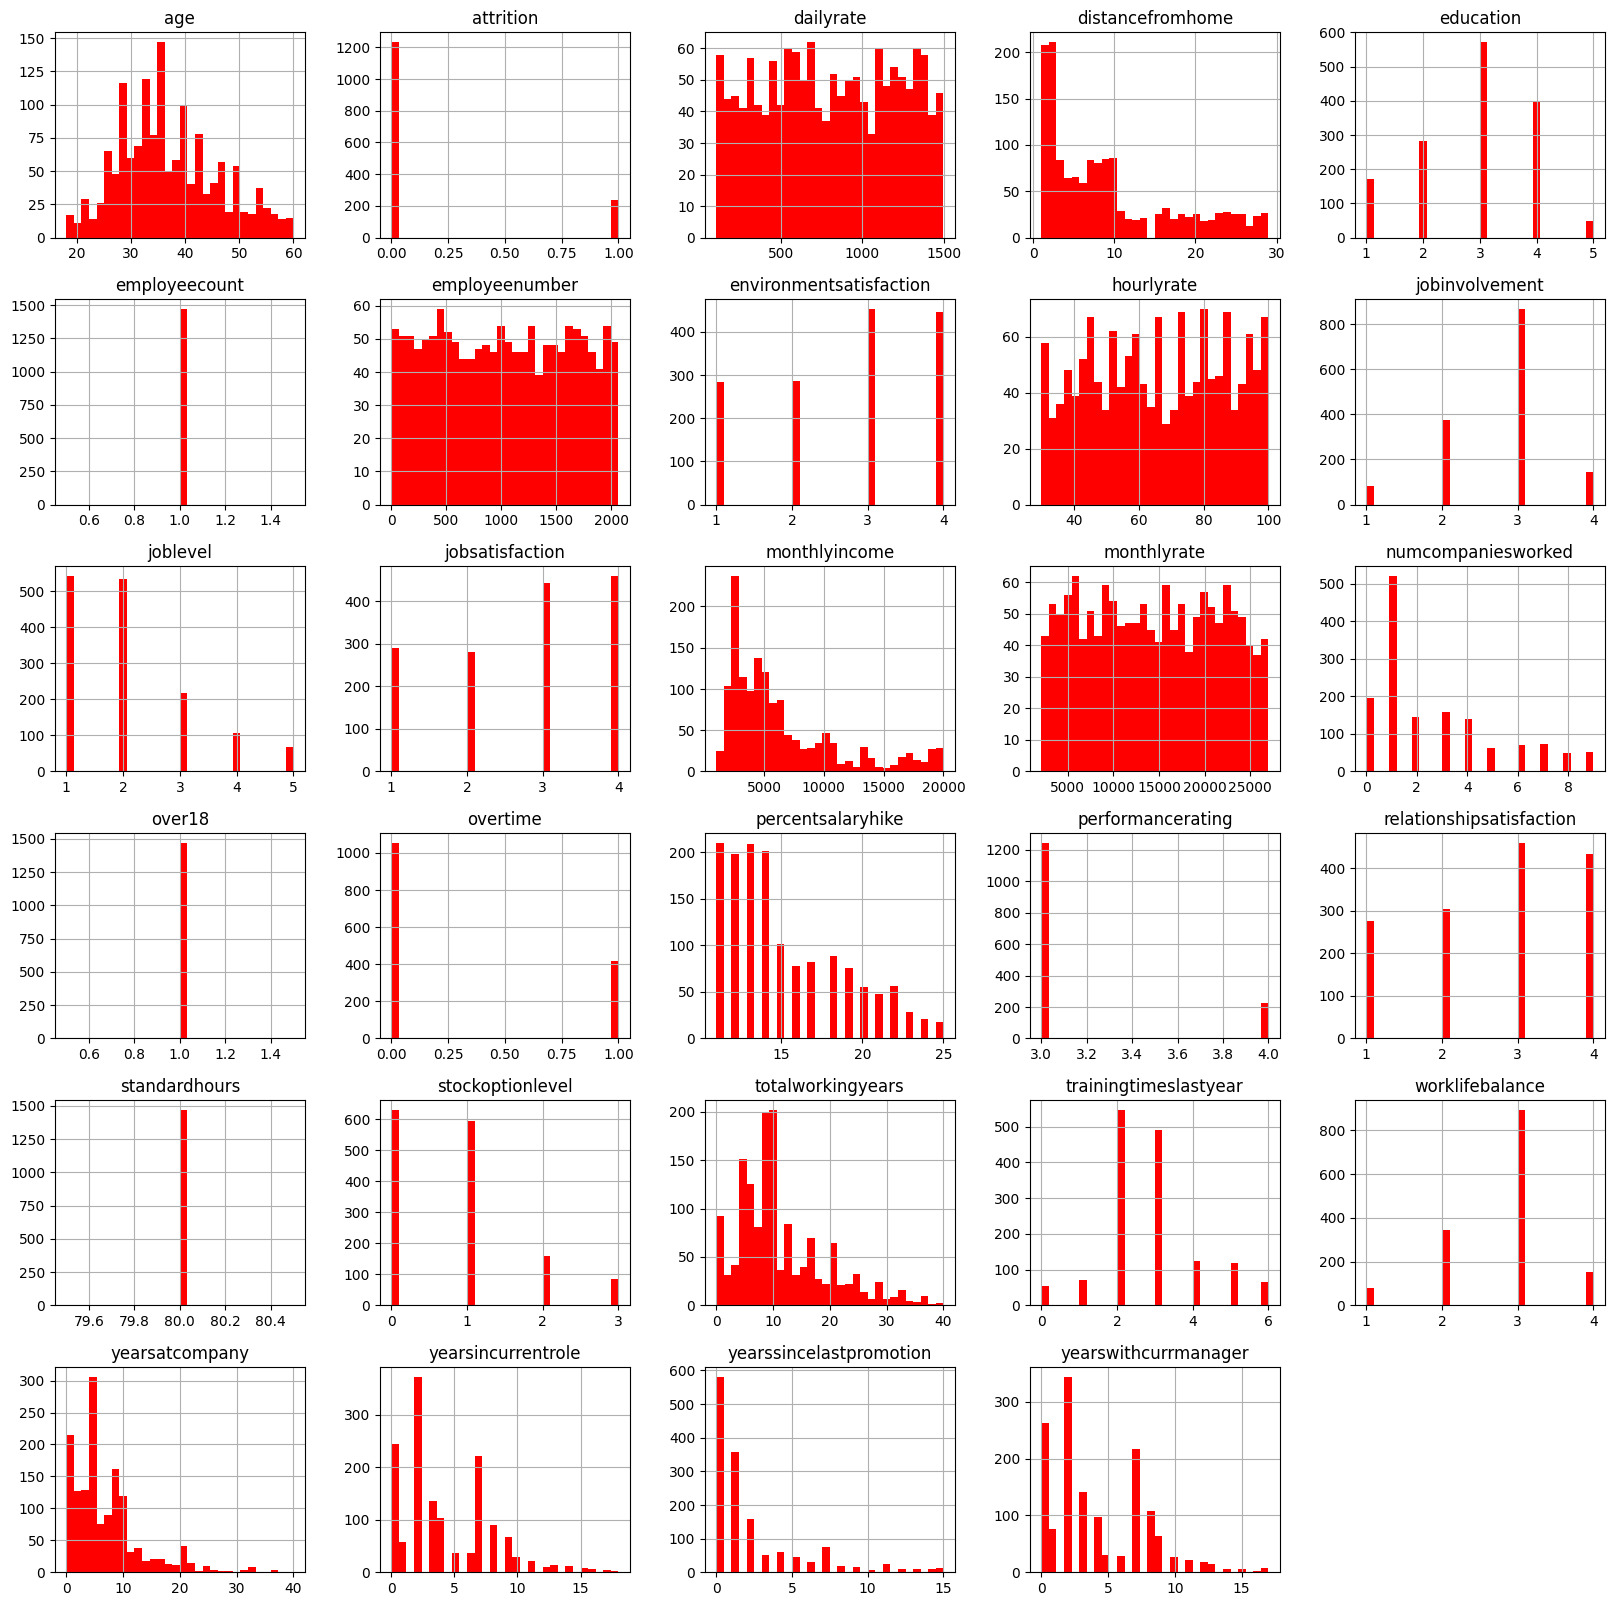

In [50]:
df.hist(bins=30, figsize=(20,20), color="r")



Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy.
This will be a problem to our model later.


It makes sense to drop 'employeecount' , 'standardhours' and 'over18' since they do not change from one employee to the other.
Let's drop 'employeeNumber' as well.

In [51]:
df.drop(["employeecount", "standardhours", "over18", "employeenumber"], axis=1, inplace=True)

Let's see how many employees left the company.

In [52]:
left_df = df[df["attrition"]==1]
stayed_df = df[df["attrition"]==0]

In [53]:
print("Total =", len(df))

print("Number of employees who left the company =", len(left_df))
print("Percentage of employees who left the company =", 1.*len(left_df)/len(df)*100.0, "%")

print("Number of employees who did not leave the company (stayed) =", len(stayed_df))
print("Percentage of employees who did not leave the company (stayed) =", 1.*len(stayed_df)/len(df)*100.0, "%")

Total = 1470
Number of employees who left the company = 237
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 1233
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


Let's compare the mean and std of the employees who stayed and left.

In [54]:
left_df.describe()



,age,attrition,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [55]:
stayed_df.describe()

,age,attrition,dailyrate,distancefromhome,education,environmentsatisfaction,hourlyrate,jobinvolvement,joblevel,jobsatisfaction,...,performancerating,relationshipsatisfaction,stockoptionlevel,totalworkingyears,trainingtimeslastyear,worklifebalance,yearsatcompany,yearsincurrentrole,yearssincelastpromotion,yearswithcurrmanager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


A brief resume:
1. 'age': mean age of the employees who stayed is higher compared to who left;
2. 'dailyrate': rate of employees who stayed is higher;
3. 'distancefromhome': employees who stayed live closer to home;
4. 'environmentsatisfaction' & 'jobsatisfaction': employees who stayed are generally more satisifed with their jobs5.
5. 'stockoptionlevel': employees who stayed tend to have higher stock option level.

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

What we can conlude with is:

1. Job level is strongly correlated with total working hours;
2.  Monthly income is strongly correlated with Job level;
3.  Monthly income is strongly correlated with total working hours;
4.  Age is stongly correlated with monthly income.

<Axes: xlabel='Age', ylabel='count'>

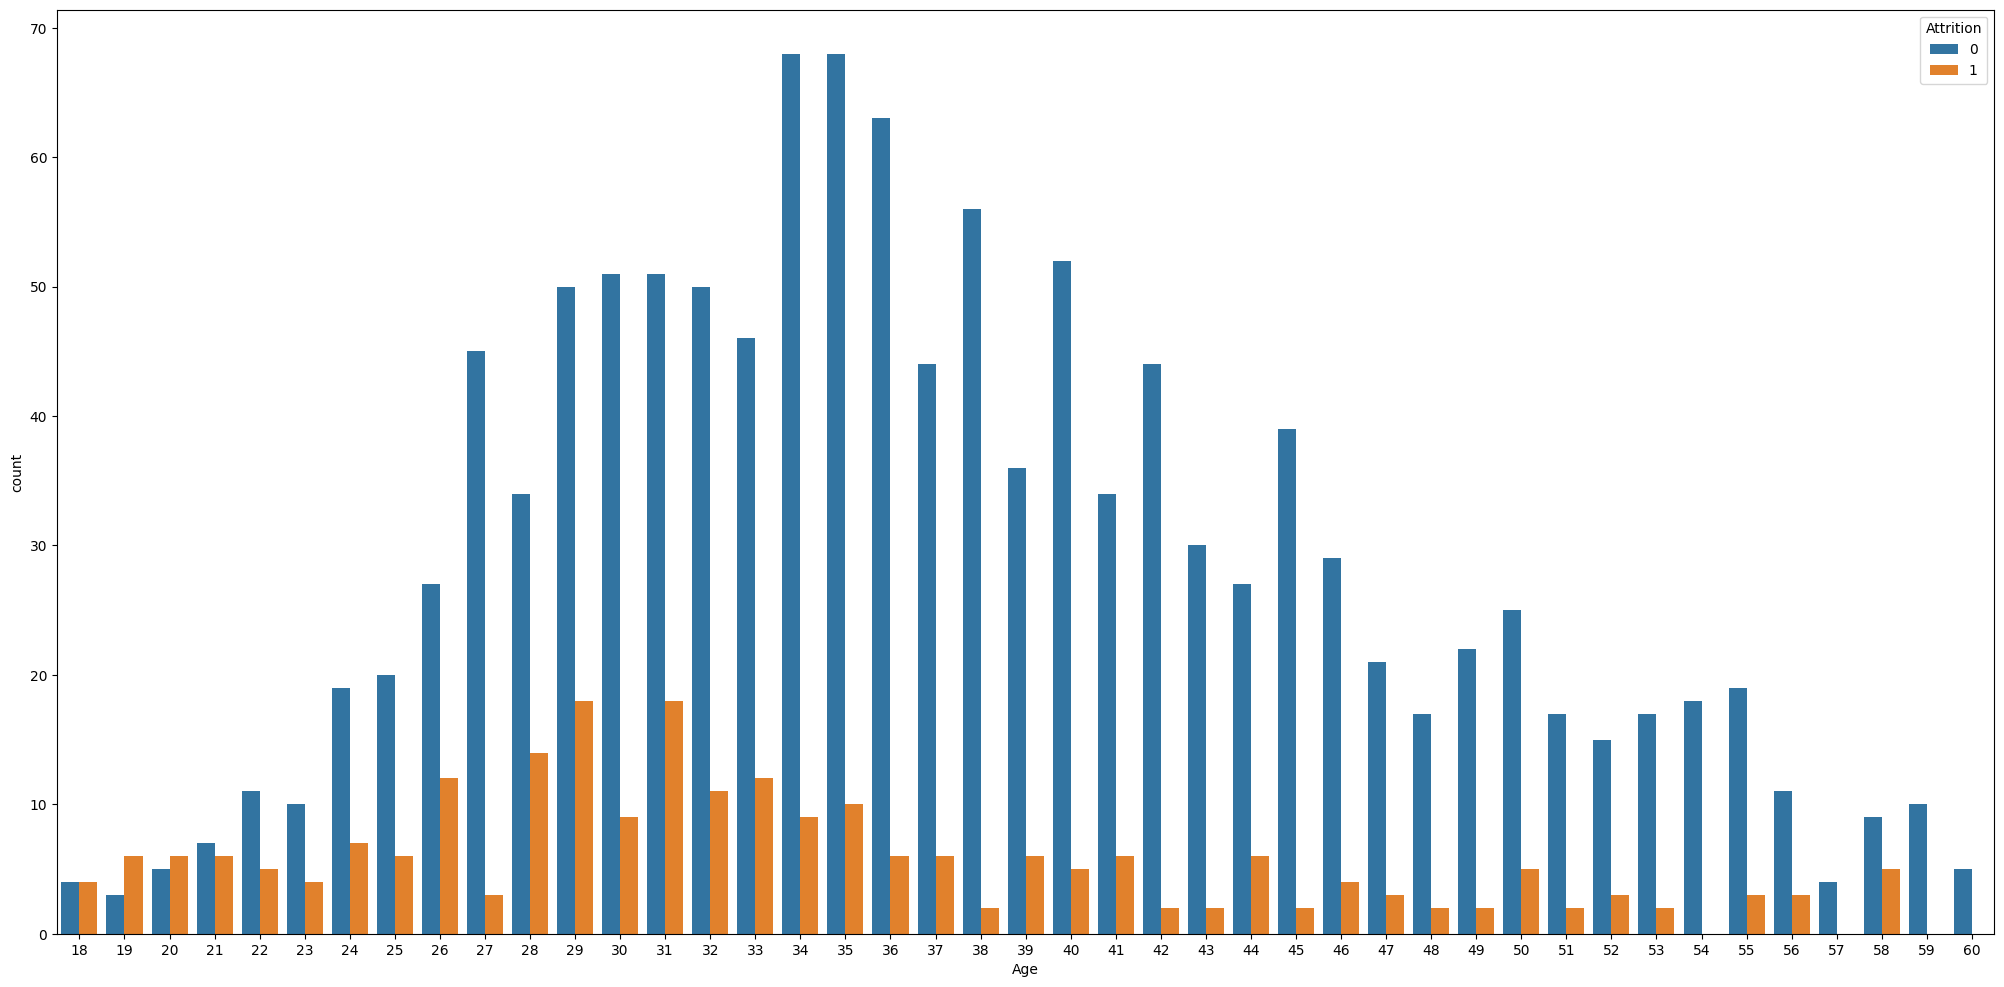

In [21]:
plt.figure(figsize=[25, 12])
sns.countplot(x="Age", hue="Attrition", data=df)

<Axes: xlabel='joblevel', ylabel='count'>

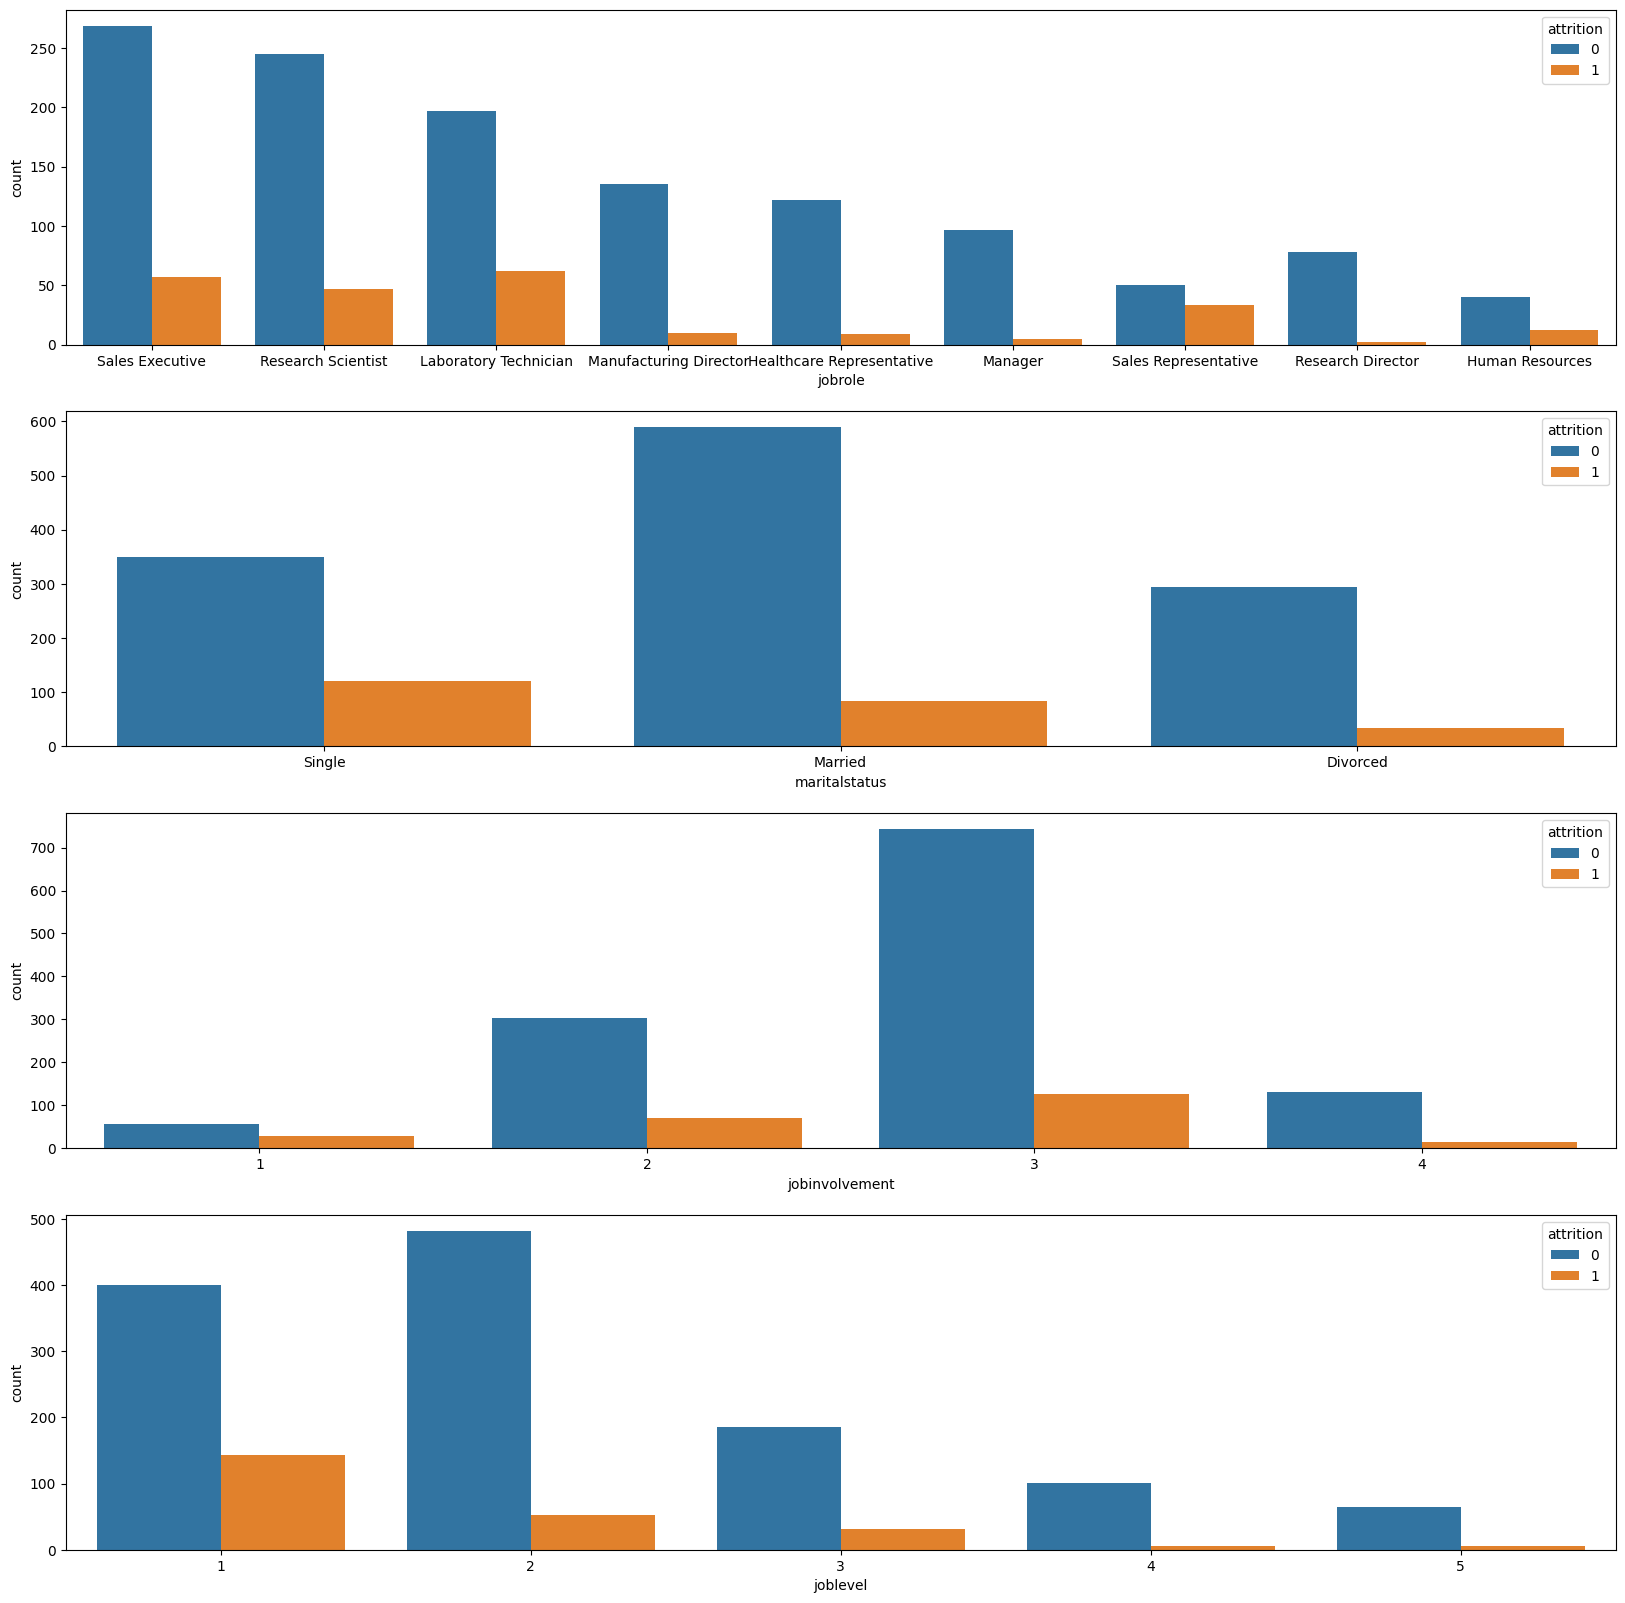

In [57]:
plt.figure(figsize=[20,20])

plt.subplot(411)
sns.countplot(x="jobrole", hue="attrition", data=df)

plt.subplot(412)
sns.countplot(x="maritalstatus", hue="attrition", data=df)

plt.subplot(413)
sns.countplot(x="jobinvolvement", hue="attrition", data=df)

plt.subplot(414)
sns.countplot(x="joblevel", hue="attrition", data=df)


We see that:
1.  Single employees tend to leave compared to married and divorced
2.  Sales Representitives tend to leave compared to any other job
3.  Less involved employees tend to leave the company
4. Less experienced (low job level) tend to leave the company

Another useful visualization is perform probability density with KDE.
Let's see the distance from home.

Text(0.5, 0, 'Distance From Home')

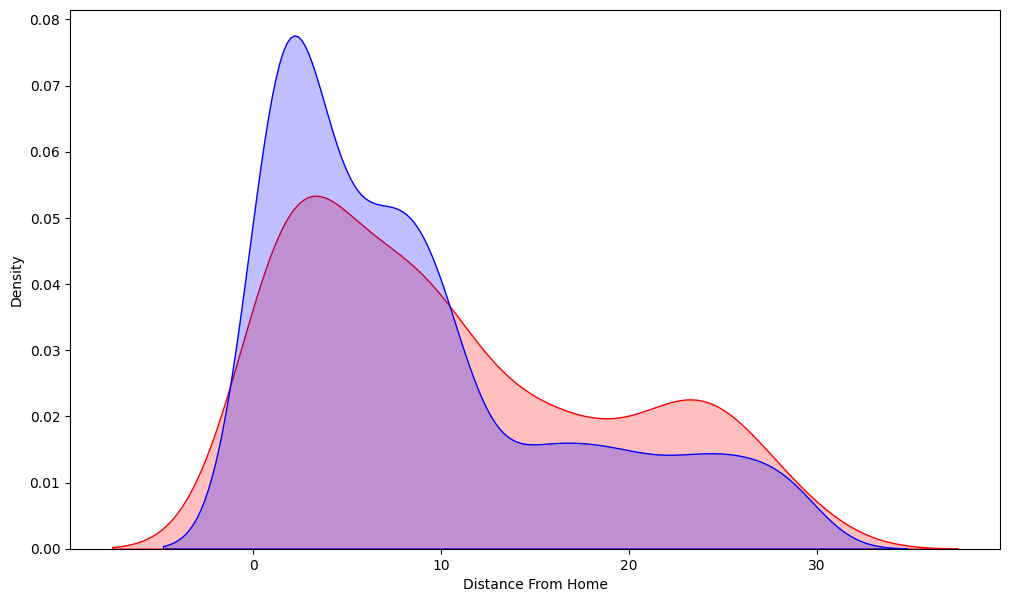

In [58]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df["distancefromhome"], label = "Employees who left",
            fill=True, color="r")
sns.kdeplot(stayed_df["distancefromhome"], label = "Employees who stayed",
            fill=True, color="b")

plt.xlabel("Distance From Home")

Hmmm... maybe there's a correlation between attrition and distance, right?

Now about years with curr manager.

Text(0.5, 0, 'Years With Curr Manager')

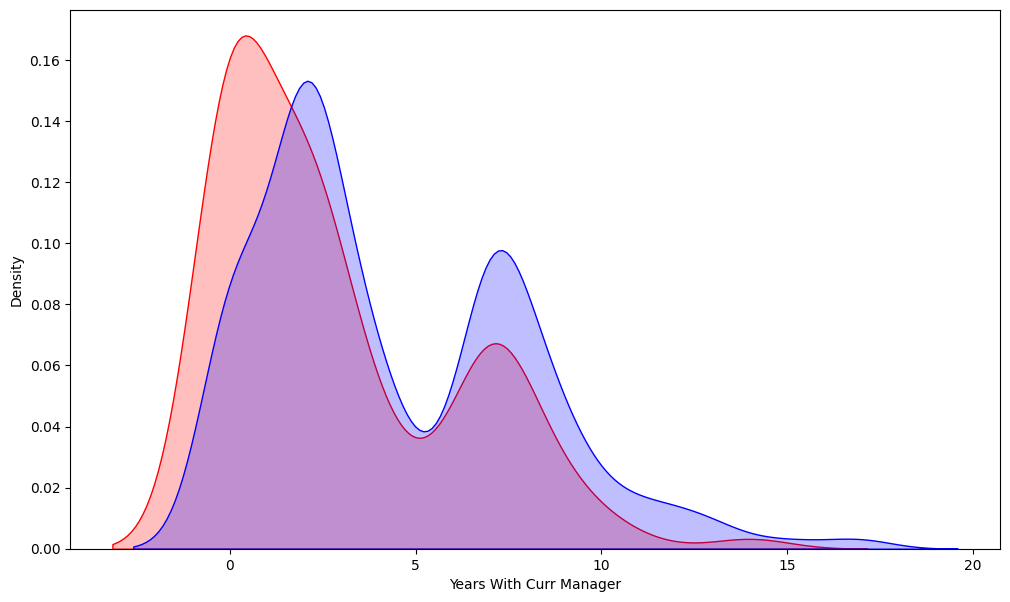

In [59]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df["yearswithcurrmanager"], label = "Employees who left",
            fill=True, color="r")
sns.kdeplot(stayed_df["yearswithcurrmanager"], label = "Employees who stayed",
            fill=True, color="b")

plt.xlabel("Years With Curr Manager")

Text(0.5, 0, 'Total Working Years')

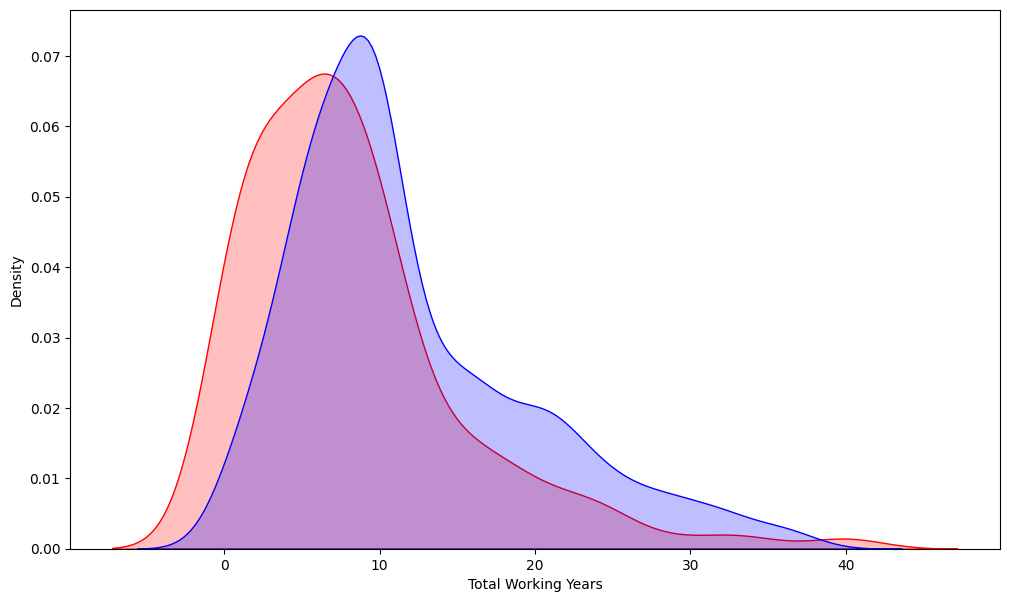

In [60]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df["totalworkingyears"], label = "Employees who left",
            fill=True, color="r")
sns.kdeplot(stayed_df["totalworkingyears"], label = "Employees who stayed",
            fill=True, color="b")

plt.xlabel("Total Working Years")

<Axes: xlabel='monthlyincome', ylabel='gender'>

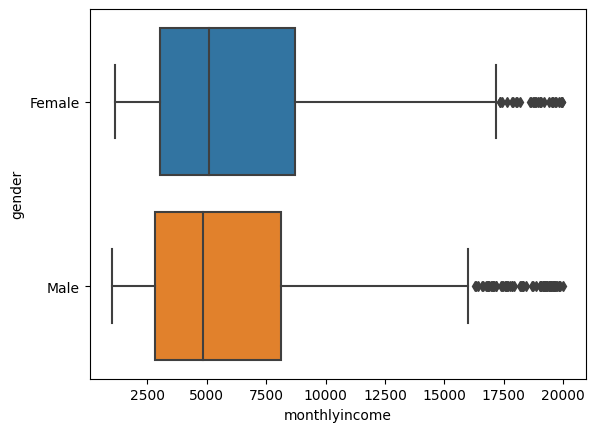

In [61]:
sns.boxplot(x="monthlyincome", y="gender", data=df)

<Axes: xlabel='monthlyincome', ylabel='jobrole'>

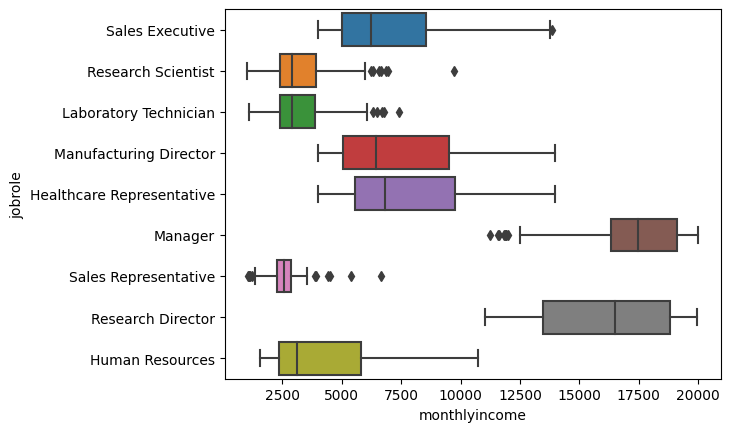

In [62]:
sns.boxplot(x="monthlyincome", y="jobrole", data=df)


# Modeling

## Step 1: cleaning the data

In [30]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

In [32]:
X = df.drop("Attrition", axis=1)
X_prep = preprocessing.fit_transform(X)

In [33]:
y = df["Attrition"]
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Step 3: training and evaluating models

### a logistic regression classifier

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train , y_test = train_test_split(X_trans, y, test_size=0.25)

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
X_test.shape

(368, 50)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print("Accuracy {} %".format(100*accuracy_score(y_pred, y_test)))

Accuracy 87.5 %


<Axes: >

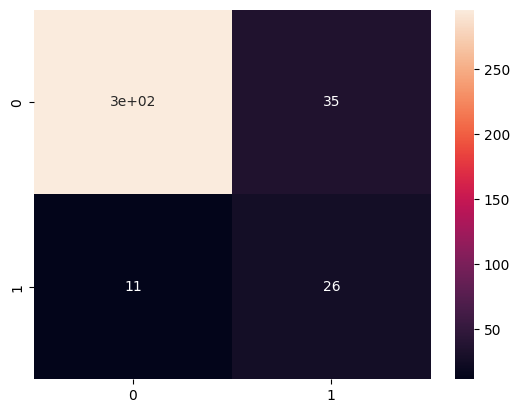

In [ ]:
# Testing Set Performance
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       307
           1       0.70      0.43      0.53        61

    accuracy                           0.88       368
   macro avg       0.80      0.70      0.73       368
weighted avg       0.86      0.88      0.86       368



### a random forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

<Axes: >

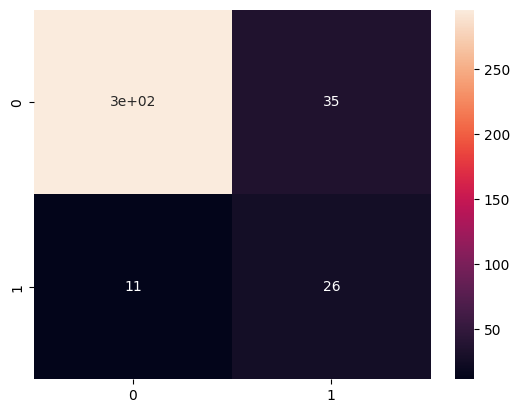

In [ ]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [ ]:
# Testing Set Performance


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       307
           1       0.70      0.43      0.53        61

    accuracy                           0.88       368
   macro avg       0.80      0.70      0.73       368
weighted avg       0.86      0.88      0.86       368



### a deep learning model

In [ ]:
import tensorflow as tf

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(500, activation="relu", input_shape=(50, )))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(500, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
# oversampler = SMOTE(random_state=0)
# smote_train, smote_target = oversampler.fit_sample(X_train, y_train)
# epochs_hist = model.fit(smote_train, smote_target, epochs = 100, batch_size = 50)

epochs_hist = model.fit(X_train, y_train, epochs=100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 3s 19ms/step - loss: 0.4598 - accuracy: 0.8403
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.3138 - accuracy: 0.8693
Epoch 3/100
23/23 [==============================] - 0s 20ms/step - loss: 0.2744 - accuracy: 0.9011
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 0.2222 - accuracy: 0.9093
Epoch 5/100
23/23 [==============================] - 1s 28ms/step - loss: 0.1769 - accuracy: 0.9301
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.1398 - accuracy: 0.9383
Epoch 7/100
23/23 [==============================] - 1s 25ms/step - loss: 0.1074 - accuracy: 0.9528
Epoch 8/100
23/23 [==============================] - 1s 27ms/step - loss: 0.0488 - accuracy: 0.9846
Epoch 9/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0236 - accuracy: 0.9955
Epoch 10/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0079 - accuracy: 0.9991

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


12/12 [==============================] - 0s 5ms/step


In [ ]:
y_pred

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

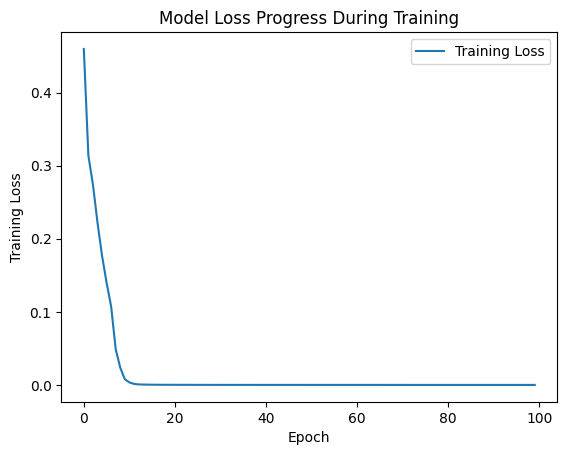

In [ ]:
plt.plot(epochs_hist.history["loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])

AttributeError: ignored

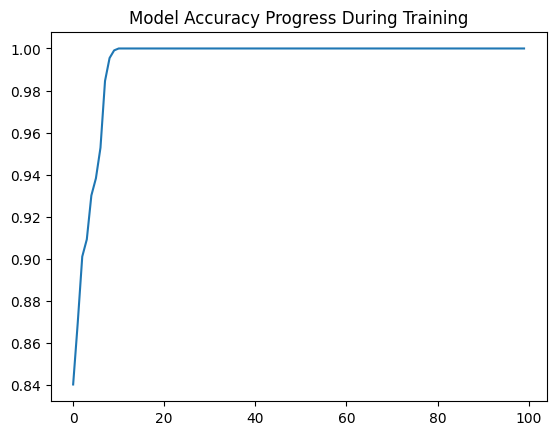

In [ ]:
plt.plot(epochs_hist.history["accuracy"])
plt.title("Model Accuracy Progress During Training")
plt.xçabel("Epoch")
plt.ylabel("Training Accuracy")
plt.legend(["Training Accuracy"])

<Axes: >

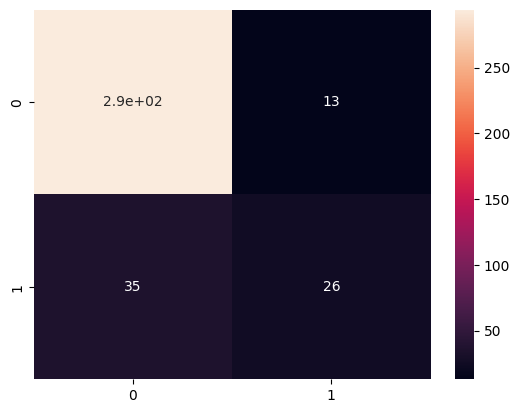

In [ ]:
# Testing Set Performance

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       307
           1       0.67      0.43      0.52        61

    accuracy                           0.87       368
   macro avg       0.78      0.69      0.72       368
weighted avg       0.86      0.87      0.86       368



# Conclusion